# 1. Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
import seaborn as sns
%matplotlib inline

## contents

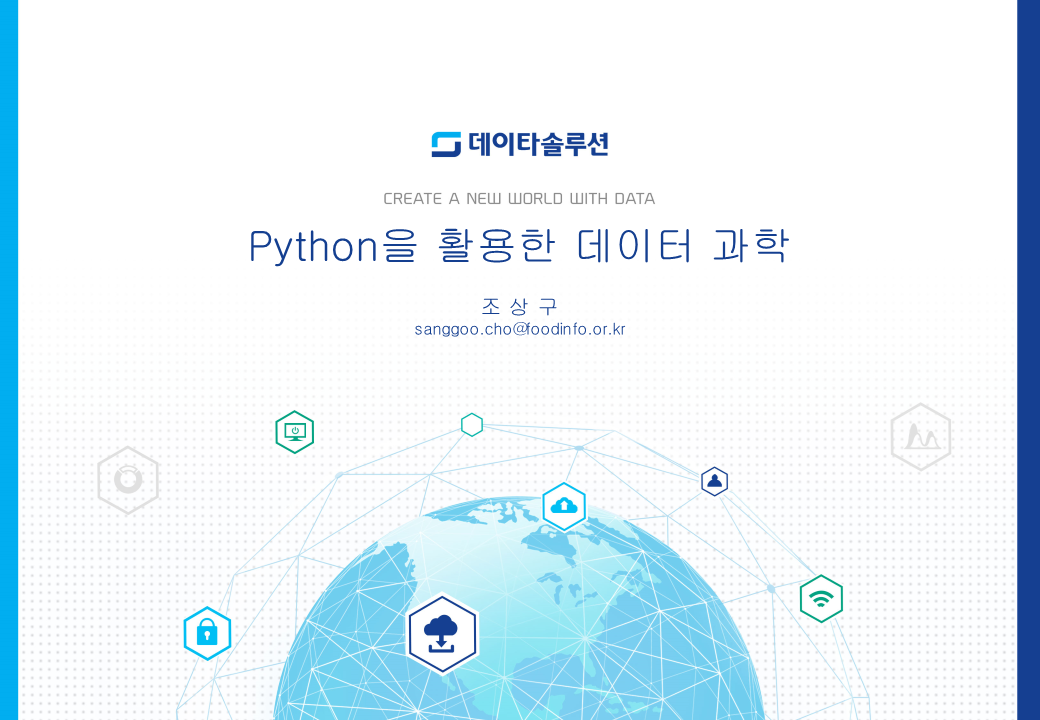

In [2]:
from IPython.display import Image
width = 800; height = 600
Image(filename='../img/슬라이드1.png', width=width, height=height)

# 참고 자료

https://scikit-learn.org/dev/index.html

https://www.kaggle.com/

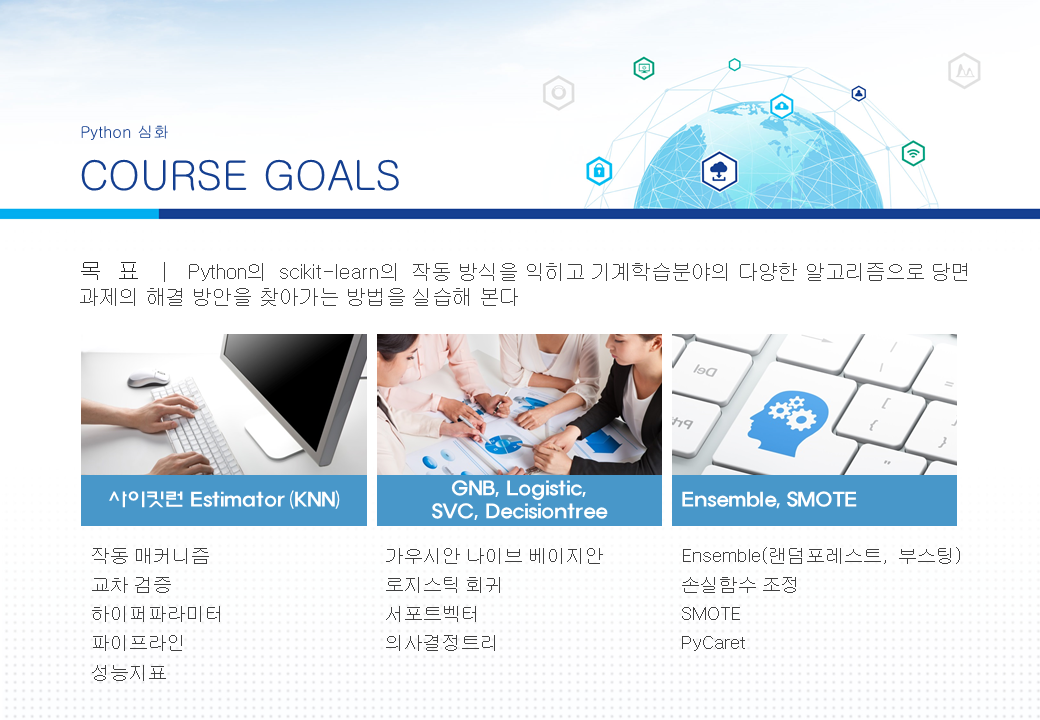

In [3]:
Image(filename='../img/슬라이드7.png', width=width, height=height)

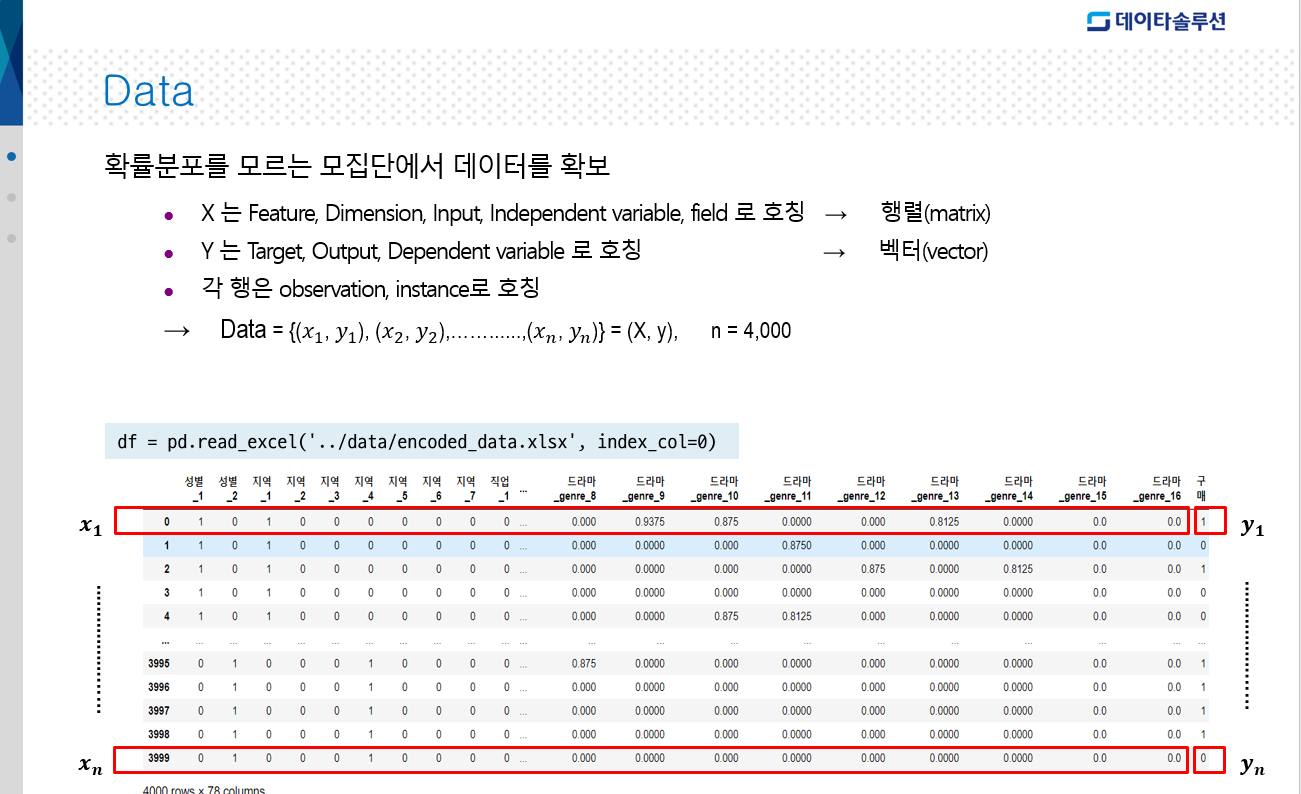

In [4]:
Image(filename='../img/setup01.png', width=width, height=height)

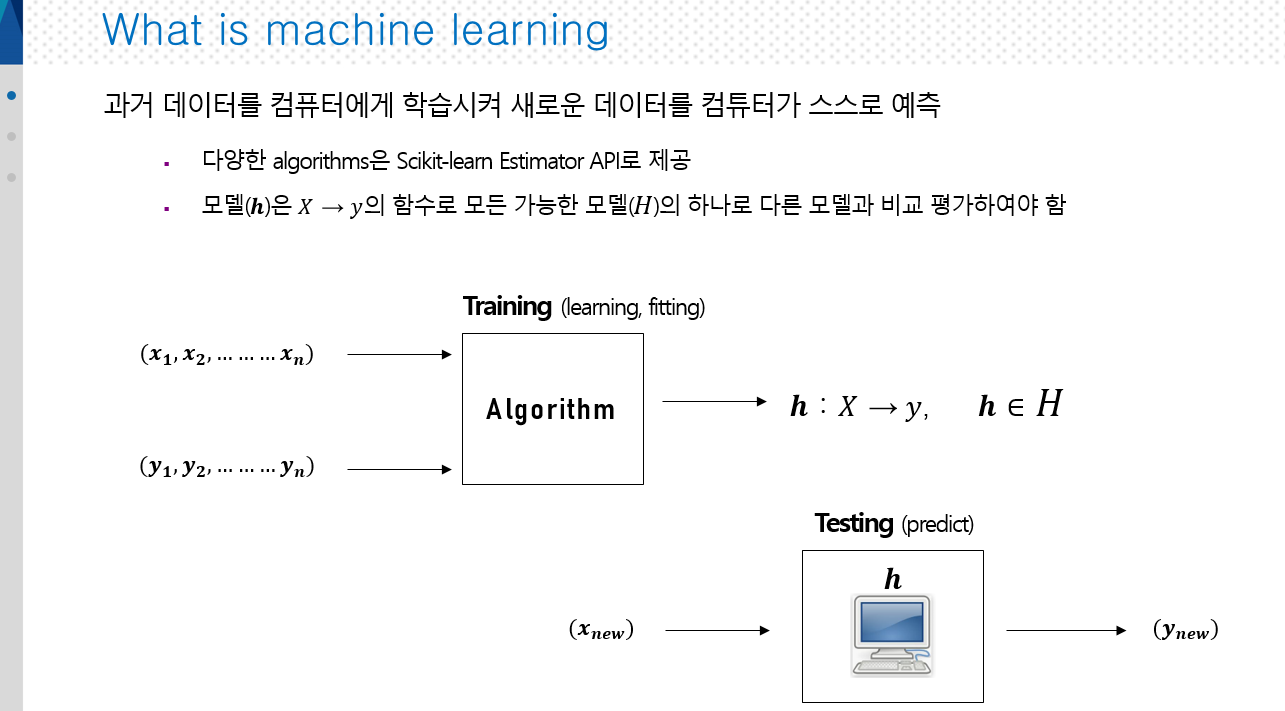

In [5]:
Image(filename='../img/setup02.png', width=width, height=height)

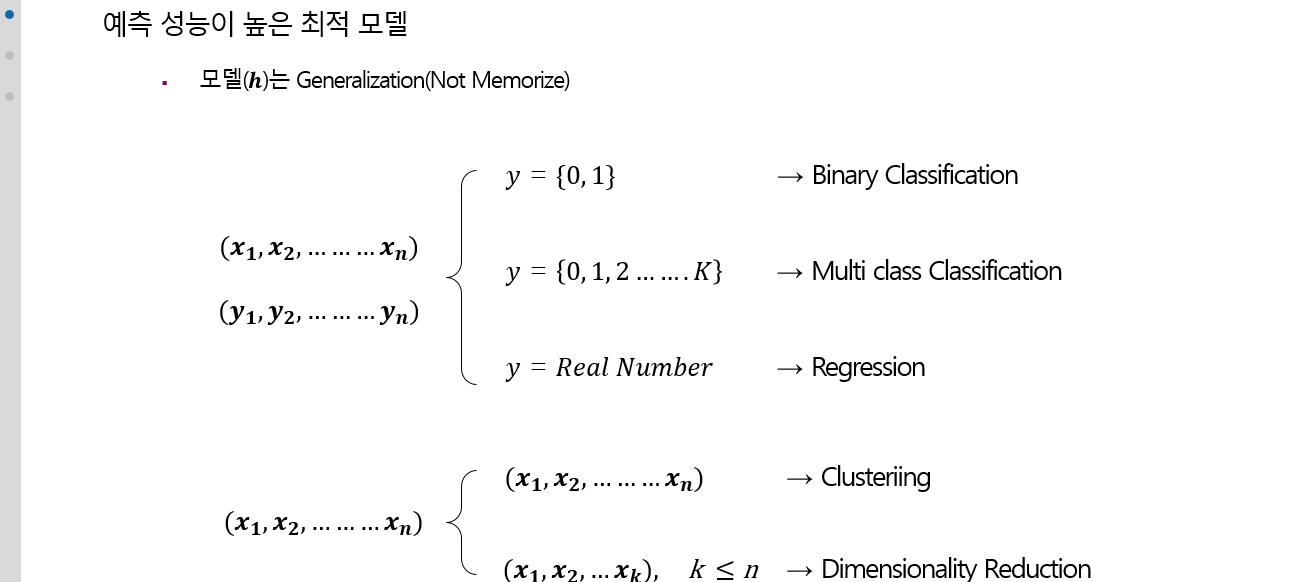

In [6]:
Image(filename='../img/setup03.png', width=width, height=height)

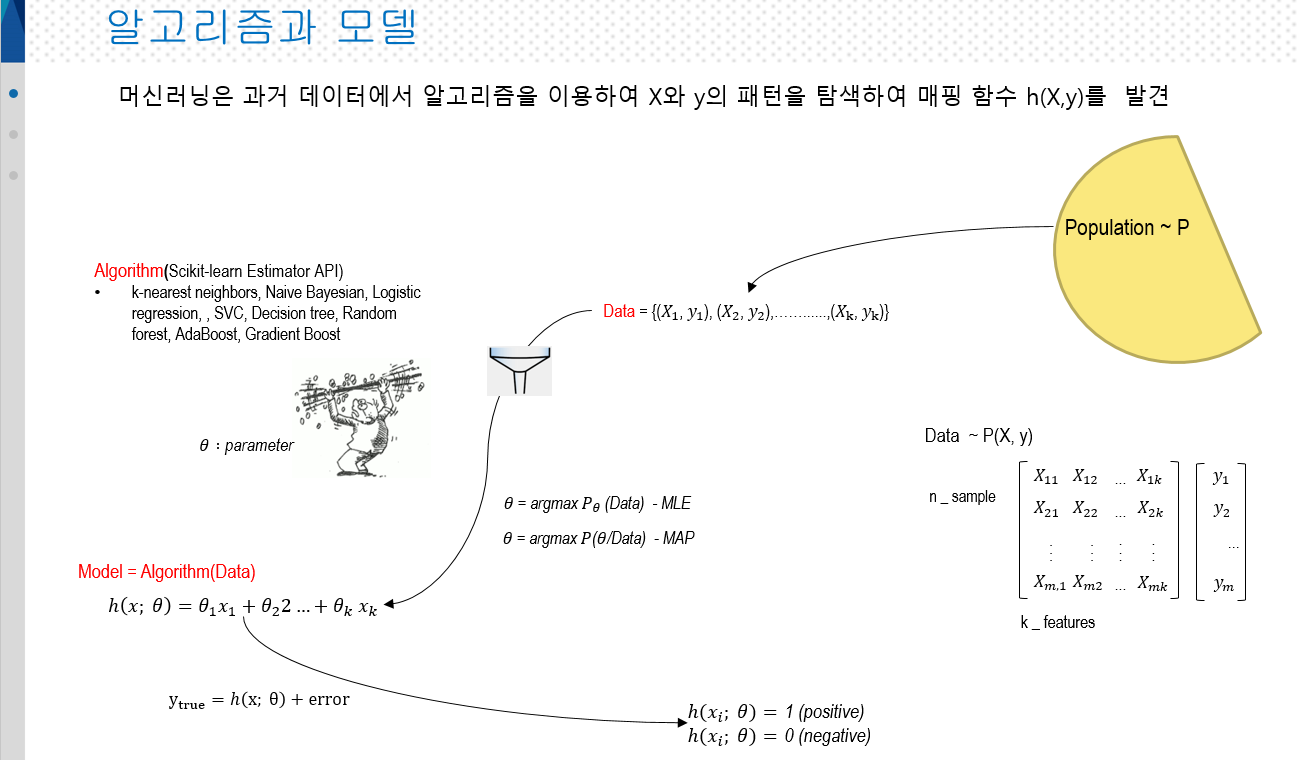

In [7]:
Image(filename='../img/setup04.png', width=width, height=height)

## 모델과 알고리즘 (fit, predict)
### Stochastic gradient descent algorithm)

####  선형일차결합 모델 based 회귀분석을 가정
- 절편과 기울기는 내부 파라미터 (모델이 추정하는 값)
- 학습율과 epoch은 외부 파라미터 (Hyperparameter)

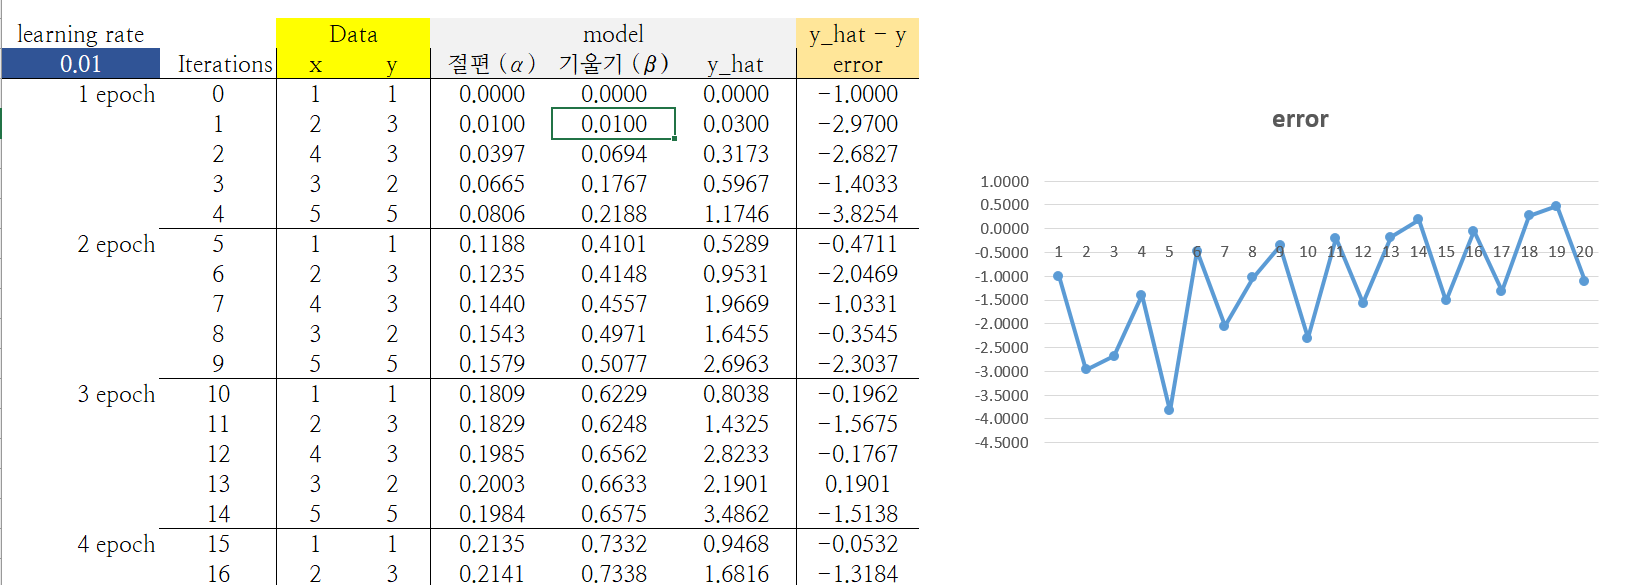

In [8]:
Image(filename='../img/reg.png', width=1000, height=800)

## <font color='blue'> 1. Stochastic Gradient Descent Algorithm

### 1.1. 데이터 준비

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

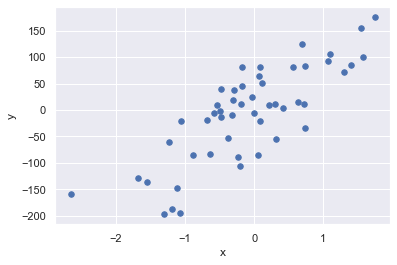

In [9]:
sns.set()
from sklearn.datasets import make_regression
X, y, w= make_regression(n_samples=50, n_features=1, noise=50,
                         coef=True, random_state=11)
X = np.squeeze(X); y = np.squeeze(y)
plt.scatter(X, y, s=30); plt.xlabel("x"); plt.ylabel("y")

### 1.2 알고리즘 정의
#### 파라미터 정의

In [10]:
lr = 0.01               
epochs = 50           
alpha= 0; beta= 0;          
y_hat = alpha + beta*X[0]   
error = y_hat - y[0]      

In [11]:
def gradient(alpha, beta, error, row) :
    alpha = alpha - lr*error
    beta =  beta - lr*error*X[row-1]
    y_hat = alpha + beta*X[row]
    error =  y_hat - y[row] 
    return alpha, beta, y_hat, error

### 1.3 모델 (파라미터 추정)

In [12]:
data = []
for row in np.arange(1, len(X)):               # epoch 1
    alpha, beta, y_hat, error = gradient(alpha, beta, error, row)
    t = (alpha, beta, y_hat, error)

    data.append(list(t))

for iter in np.arange(epochs-1) :            # epoch 2 ~50
    for row in np.arange(0, len(X)):
        alpha, beta, y_hat, error = gradient(alpha, beta, error, row)
        t = (alpha, beta, y_hat, error)
        data.append(list(t))

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

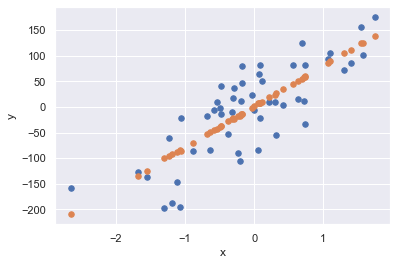

In [13]:
data = pd.DataFrame(data, columns =['alpha', 'beta', 'y_hat', 'error'])
y_hat = data.loc[(len(data)-len(X)):len(data), 'y_hat']
plt.scatter(X, y, s=30); plt.scatter(X, y_hat, s=30)
plt.xlabel("x"); plt.ylabel("y")

## <font color='blue'> 2. Batch Gradient Descent Algorithm

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

### 2.1. 데이터 준비

In [15]:
# Load and split data
df = load_boston()

In [16]:
df.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [17]:
X,y = df['data'],df['target']

#### 훈련과 검증 데이터 구분

In [18]:
def train_test_divide(X,y,test_size, random_state=1103):
    np.random.seed(random_state)
    train_size = 1 - test_size
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand,(100*train_size))
    
    X_train = X[split]; y_train = y[split]
    X_test =  X[~split]; y_test = y[~split]
    
    return X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test = train_test_divide(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

### 2.2 알고리즘 정의

In [19]:
def mse(preds, y):   # cost is the mean squared error (목적함수 정의)
        m = len(y)
        mse = 1/(m) * np.sum(np.square((y - preds)))
        
        return mse

In [20]:
class BatchSgd:
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.m = len(y)
        self.bgd = False                     # The bgd boolean is a parameter that defines whether or not we should use Batch Gradient Descent or not.
        
    def add_intercept_term(self,X):          # better fit with increase the degree of freedom
        X = np.insert(X,1,np.ones(X.shape[0:1]),axis=1).copy()
        return X
    
    def feature_scale(self,X):               # 자료 표준화 (평균0, 분산1)
        X = (X - X.mean()) / (X.std())
        return X
    
    def initialise_thetas(self):             # 파라미터를 랜덤으로 정의
        np.random.seed(42)
        self.thetas = np.random.rand(self.X.shape[1])
        
    def normal_equation(self):               # theta = Inverse(X_transpose * X)* y
        A = np.linalg.inv(np.dot(self.X.T,self.X))
        B = np.dot(self.X.T,self.y)
        thetas = np.dot(A,B)
        return thetas
    
    def batch_gradient_descent(self,alpha,n_iterations):  # 배치 경사하강 알고리즘 정의
        self.cost_history = [0] * (n_iterations)
        self.n_iterations = n_iterations
        
        for i in range(n_iterations):
            h = np.dot(self.X,self.thetas.T)
            gradient = alpha * (1/self.m) * ((h - self.y)).dot(self.X)
            
            self.thetas = self.thetas - gradient
            self.cost_history[i] = mse(np.dot(self.X,self.thetas.T),self.y)
            
        return self.thetas
    
    def fit(self,bgd=False,alpha=0.001,n_iterations=4000):     # Training, Learning, Fit model to data
        self.X = self.add_intercept_term(self.X)
        self.X = self.feature_scale(self.X)
        if bgd == False:
            
            self.thetas = self.normal_equation()
        else:
            self.bgd = True
            self.initialise_thetas()
            self.thetas = self.batch_gradient_descent(alpha,n_iterations)
            
    def predict(self,X_test):                                  # Predict
        self.X_test = X_test.copy()
        self.X_test = self.add_intercept_term(self.X_test)
        self.X_test = self.feature_scale(self.X_test)
        predictions = np.dot(self.X_test,self.thetas.T)
        return predictions

### 2.3 모델 (파라미터 추정)

In [21]:
model= BatchSgd(X_train, y_train)                 # 1. 모델 객체화
model.fit()                                      # 2. 학습하기
model                                            #  학습한 모델 내부 저장
y_prediction = model.predict(X_test)             # 3. 예측하기 (unseen data)
print(f'최소좌승값은  : {mse(y_test,y_prediction)}')

최소좌승값은  : 23.773333071932473


Text(0.5, 0, 'x')

Text(0, 0.5, 'y_test & y_predict')

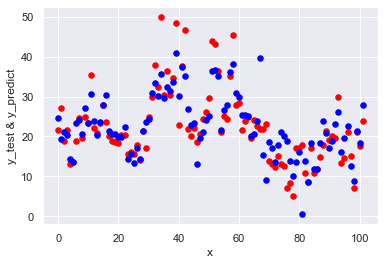

In [22]:
plt.scatter(np.arange(X_test.shape[0]), y_test, color='red', s=30)
plt.scatter(np.arange(X_test.shape[0]), y_prediction, color='blue', s=30)
plt.xlabel("x"); plt.ylabel("y_test & y_predict")

## <font color='red'> 3. Scikit-Learn Estimator API

In [23]:
from sklearn.linear_model import SGDRegressor # LinearRegression (실습용)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = load_boston()
X,y = df['data'],df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [24]:
# SkLearn SGD classifier
model = SGDRegressor(max_iter=1000)
model.fit(X_train, y_train)
y_predict =model.predict(X_test)

SGDRegressor()

### 결과 해석

In [25]:
model.intercept_
model.coef_

array([-8.75164539e+09])

array([ 1.26448503e+10,  2.73820584e+11, -4.70296294e+09, -1.69136497e+10,
       -5.76896228e+09,  3.82816745e+10, -5.63284916e+11, -2.34291378e+11,
       -4.48334854e+11, -2.65117903e+11, -3.50088378e+09,  5.35554578e+11,
       -4.72307045e+11])

Text(0.5, 0, 'Actual y')

Text(0, 0.5, 'Predicted y')

Text(0.5, 1.0, 'Scatter plot from actual y and predicted y')

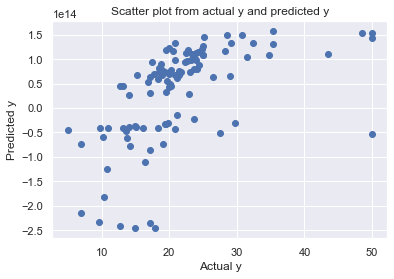

Mean Squared Error : 1.0801332830860145e+28


In [26]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual y'); plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_predict))

# <font color='red'> Why Why Why ?????

In [27]:
# standardizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

SGDRegressor()

Text(0.5, 0, 'Actual y')

Text(0, 0.5, 'Predicted y')

Text(0.5, 1.0, 'Scatter plot from actual y and predicted y')

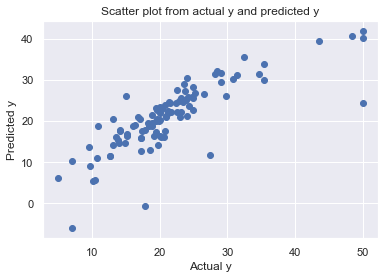

Mean Squared Error : 25.040805627290286


In [28]:
# SkLearn SGD classifier
model = SGDRegressor(max_iter=1000)
model.fit(X_train, y_train)
y_predict =model.predict(X_test)

plt.scatter(y_test,y_predict)
plt.xlabel('Actual y'); plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_predict))

## <font color='purple'> It's your turn

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_predict =model.predict(X_test)
print('Mean Squared Error :',mean_squared_error(y_test, y_predict))

LinearRegression()

Mean Squared Error : 24.291119474973517


## 성능지표 (이진분류, Binary Classification)

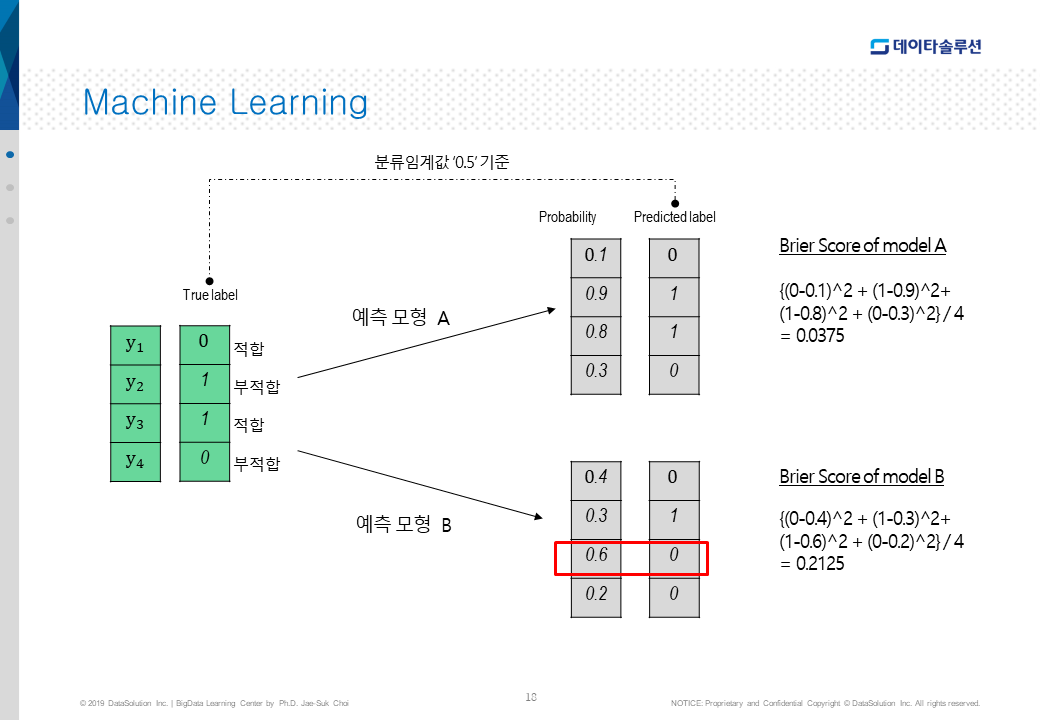

In [30]:
Image(filename='../img/슬라이드18.png', width=width, height=height)

In [31]:
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])

y_smart = np.array([0.1, 0.9, 0.8, 0.3])
y_normal = np.array([0.4, 0.3, 0.6, 0.2])
y_dummy = np.array([0.5, 0.5, 0.5, 0.5])
y_stupid = np.array([0.9, 0.1, 0.7, 0.7])

In [32]:
brier_score_loss(y_true, y_smart)

brier_score_loss(y_true, y_normal)

brier_score_loss(y_true, y_dummy)

brier_score_loss(y_true, y_stupid)

0.03749999999999999

0.2125

0.25

0.55

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



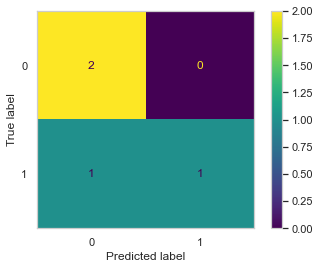

In [33]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

y_pred = np.array(y_normal) > 0.5
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_true, y_pred))

## End